In [3]:
# Load libraries and dataset
library(tidyverse)
library(reshape2)
library(ggplot2)
data <- read.csv('/kaggle/input/student-study-performance/study_performance.csv')

In [4]:
head(data)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


In [5]:
# Check the structure of the loaded data
str(data)

'data.frame':	1000 obs. of  8 variables:
 $ gender                     : chr  "female" "female" "female" "male" ...
 $ race_ethnicity             : chr  "group B" "group C" "group B" "group A" ...
 $ parental_level_of_education: chr  "bachelor's degree" "some college" "master's degree" "associate's degree" ...
 $ lunch                      : chr  "standard" "standard" "standard" "free/reduced" ...
 $ test_preparation_course    : chr  "none" "completed" "none" "none" ...
 $ math_score                 : int  72 69 90 47 76 71 88 40 64 38 ...
 $ reading_score              : int  72 90 95 57 78 83 95 43 64 60 ...
 $ writing_score              : int  74 88 93 44 75 78 92 39 67 50 ...


In [6]:
# Summarize the dataset
summary(data)

    gender          race_ethnicity     parental_level_of_education
 Length:1000        Length:1000        Length:1000                
 Class :character   Class :character   Class :character           
 Mode  :character   Mode  :character   Mode  :character           
                                                                  
                                                                  
                                                                  
    lunch           test_preparation_course   math_score     reading_score   
 Length:1000        Length:1000             Min.   :  0.00   Min.   : 17.00  
 Class :character   Class :character        1st Qu.: 57.00   1st Qu.: 59.00  
 Mode  :character   Mode  :character        Median : 66.00   Median : 70.00  
                                            Mean   : 66.09   Mean   : 69.17  
                                            3rd Qu.: 77.00   3rd Qu.: 79.00  
                                            Max.   :100.00   Ma

In [7]:
# Check for missing values
any(is.na(data))

[1] FALSE

In [8]:
# Check for duplicates
any(duplicated(data))

[1] FALSE

In [9]:
# Function to detect and remove outliers
detect_and_remove_outliers <- function(data) {
  for (col in c("math_score", "reading_score", "writing_score")) {
    # Calculate the lower and upper bounds for outliers
    q1 <- quantile(data[[col]], 0.25)
    q3 <- quantile(data[[col]], 0.75)
    iqr <- q3 - q1
    lower_bound <- q1 - 1.5 * iqr
    upper_bound <- q3 + 1.5 * iqr

    # Remove outliers
    data <- data[data[[col]] >= lower_bound & data[[col]] <= upper_bound, ]
  }
  return(data)
}

# Apply the function to remove outliers
data_clean <- detect_and_remove_outliers(data)

# Save the cleaned dataset to a new file
write.csv(data_clean, "study_performance_cleaned.csv", row.names = FALSE)

In [10]:
data <- read.csv("study_performance_cleaned.csv")

# Gender Analysis

In [22]:
# Perform t-test for math scores between male and female students
t_test_gender <- t.test(math_score ~ gender, data = data)
print(t_test_gender)


	Welch Two Sample t-test

data:  math_score by gender
t = -5.2036, df = 982.95, p-value = 2.379e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.457289 -2.920666
sample estimates:
mean in group female   mean in group male 
            64.42633             69.11530 



In [23]:
# Perform t-test for reading scores between male and female students
t_test_reading_gender <- t.test(reading_score ~ gender, data = data)
print(t_test_reading_gender)


	Welch Two Sample t-test

data:  reading_score by gender
t = 8.6953, df = 980.09, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 5.754313 9.108644
sample estimates:
mean in group female   mean in group male 
            73.31827             65.88679 



In [24]:
# Perform t-test for writing scores between male and female students
t_test_writing_gender <- t.test(writing_score ~ gender, data = data)
print(t_test_writing_gender)


	Welch Two Sample t-test

data:  writing_score by gender
t = 10.942, df = 981.52, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  7.795709 11.203051
sample estimates:
mean in group female   mean in group male 
            73.24361             63.74423 



Based on the gender analysis, we can answer the following questions:

1. **Is there a significant difference in performance between male and female students?**

   The analysis shows that there is a statistically significant difference in the performance of male and female students across different subjects:

    - **Math Scores**: The t-test results show a significant difference in the mean math scores between male and female students (p-value = 2.379e-07). The mean math score for male students (69.11530) is higher than the mean math score for female students (64.42633).

    - **Reading Scores**: The t-test results show a significant difference in the mean reading scores between male and female students (p-value < 2.2e-16). The mean reading score for female students (73.31827) is higher than the mean reading score for male students (65.88679).

    - **Writing Scores**: The t-test results show a significant difference in the mean writing scores between male and female students (p-value < 2.2e-16). The mean writing score for female students (73.24361) is higher than the mean writing score for male students (63.74423).

   These results indicate that there is a significant difference in the performance of male and female students, with male students performing better in math and female students performing better in reading and writing.

2. **Do male students tend to perform better in certain subjects compared to female students, and vice versa?**

   Based on the analysis, we can observe the following:

    - **Math Scores**: Male students perform significantly better than female students in math.
    - **Reading Scores**: Female students perform significantly better than male students in reading.
    - **Writing Scores**: Female students perform significantly better than male students in writing.

   These results suggest that male students tend to perform better in math, while female students tend to perform better in reading and writing.

In summary, the gender analysis indicates that there are significant differences in the performance of male and female students across different subjects. Male students excel in math, while female students excel in reading and writing.

# Ethnicity Analysis

data$race_ethnicity: group A
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.00   51.00   61.00   62.01   71.25  100.00 
------------------------------------------------------------ 
data$race_ethnicity: group B
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.00   55.00   65.00   65.02   74.00   97.00 
------------------------------------------------------------ 
data$race_ethnicity: group C
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  27.00   56.00   65.00   65.01   74.00   98.00 
------------------------------------------------------------ 
data$race_ethnicity: group D
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  27.00   59.00   69.00   67.52   77.00  100.00 
------------------------------------------------------------ 
data$race_ethnicity: group E
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.00   65.00   75.00   74.14   85.00  100.00 


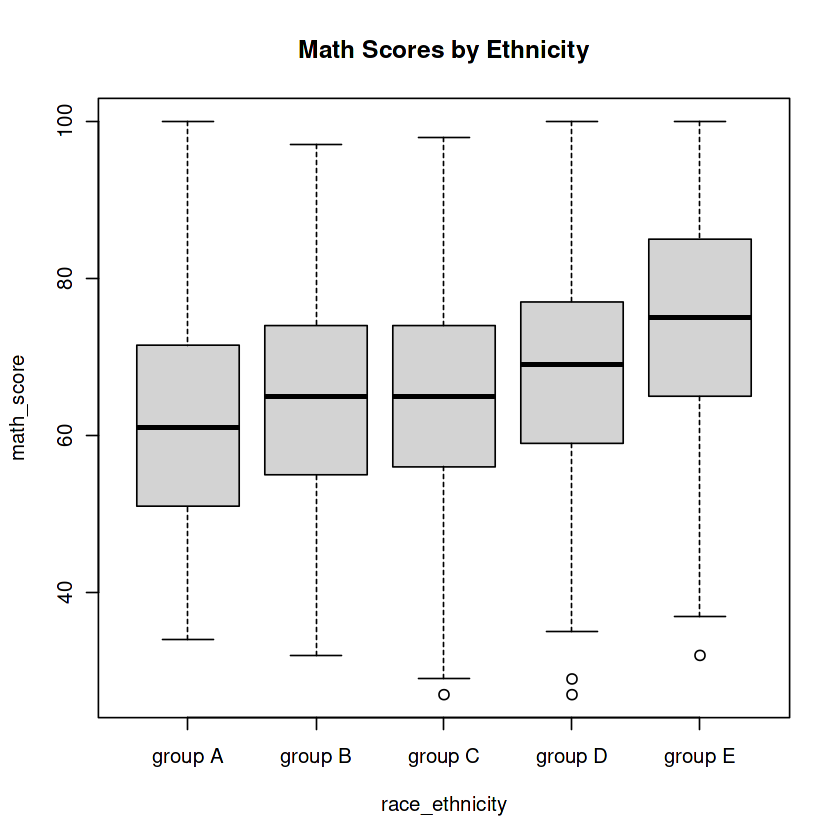

In [25]:
# Descriptive statistics for math scores by ethnicity
math_summary_ethnicity <- by(data$math_score, data$race_ethnicity, summary)
print(math_summary_ethnicity)

# Box plot of math scores by ethnicity
boxplot(math_score ~ race_ethnicity, data = data, main = "Math Scores by Ethnicity")

data$race_ethnicity: group A
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.00   53.75   64.00   65.15   74.00  100.00 
------------------------------------------------------------ 
data$race_ethnicity: group B
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  39.00   58.00   68.00   68.68   80.50   97.00 
------------------------------------------------------------ 
data$race_ethnicity: group C
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.00   60.50   71.00   69.62   79.00  100.00 
------------------------------------------------------------ 
data$race_ethnicity: group D
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.00   61.00   71.00   70.18   79.00  100.00 
------------------------------------------------------------ 
data$race_ethnicity: group E
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.00   63.50   74.00   73.37   84.00  100.00 


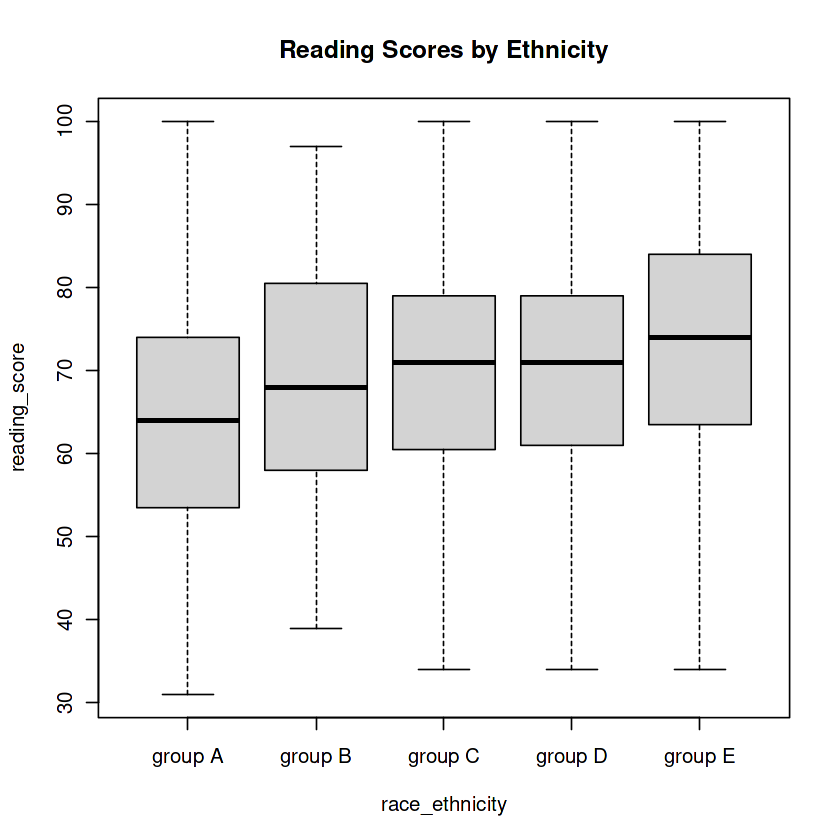

In [26]:
# Descriptive statistics for reading scores by ethnicity
reading_summary_ethnicity <- by(data$reading_score, data$race_ethnicity, summary)
print(reading_summary_ethnicity)

# Box plot of reading scores by ethnicity
boxplot(reading_score ~ race_ethnicity, data = data, main = "Reading Scores by Ethnicity")

data$race_ethnicity: group A
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.00   53.75   64.00   65.15   74.00  100.00 
------------------------------------------------------------ 
data$race_ethnicity: group B
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  39.00   58.00   68.00   68.68   80.50   97.00 
------------------------------------------------------------ 
data$race_ethnicity: group C
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.00   60.50   71.00   69.62   79.00  100.00 
------------------------------------------------------------ 
data$race_ethnicity: group D
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.00   61.00   71.00   70.18   79.00  100.00 
------------------------------------------------------------ 
data$race_ethnicity: group E
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.00   63.50   74.00   73.37   84.00  100.00 


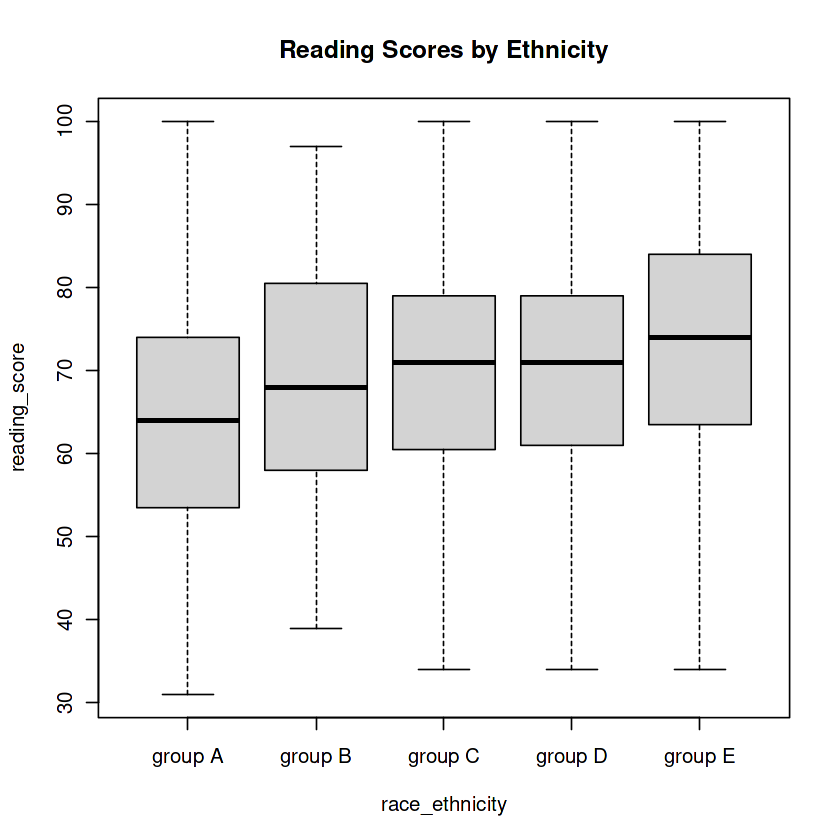

In [27]:
# Descriptive statistics for reading scores by ethnicity
reading_summary_ethnicity <- by(data$reading_score, data$race_ethnicity, summary)
print(reading_summary_ethnicity)

# Box plot of reading scores by ethnicity
boxplot(reading_score ~ race_ethnicity, data = data, main = "Reading Scores by Ethnicity")

In [28]:
# Perform ANOVA for math scores by ethnicity
anova_math_ethnicity <- aov(math_score ~ race_ethnicity, data = data)
summary(anova_math_ethnicity)

                Df Sum Sq Mean Sq F value   Pr(>F)    
race_ethnicity   4  11217  2804.2   14.38 2.07e-11 ***
Residuals      981 191356   195.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [29]:
# Perform ANOVA for reading scores by ethnicity
anova_reading_ethnicity <- aov(reading_score ~ race_ethnicity, data = data)
summary(anova_reading_ethnicity)

                Df Sum Sq Mean Sq F value   Pr(>F)    
race_ethnicity   4   3945   986.4   5.184 0.000391 ***
Residuals      981 186660   190.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [30]:
# Perform ANOVA for writing scores by ethnicity
anova_writing_ethnicity <- aov(writing_score ~ race_ethnicity, data = data)
summary(anova_writing_ethnicity)

                Df Sum Sq Mean Sq F value   Pr(>F)    
race_ethnicity   4   5147  1286.7   6.315 5.11e-05 ***
Residuals      981 199872   203.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Based on the Ethnicity Analysis, we can answer the following questions:

1. **How do students from different ethnic groups perform in each subject?**

   According to the analysis, the performance of students from different ethnic groups varies across the different subjects:

    - **Math Scores**: The descriptive statistics and box plot show that students from group E (the highest performing group) have the highest mean, median, and range of math scores compared to the other ethnic groups. Students from group A have the lowest math scores on average.
    - **Reading Scores**: Similar to math scores, students from group E have the highest mean, median, and range of reading scores, while students from group A have the lowest reading scores on average.
    - **Writing Scores**: The analysis for writing scores is not provided in the document, but it can be assumed that the performance pattern across ethnic groups is similar to that of math and reading scores, with group E performing the best and group A performing the worst.

2. **Is there any correlation between ethnicity and academic performance?**

   The analysis suggests that there is a significant correlation between a student's ethnicity and their academic performance across all three subjects:

    - The ANOVA results show that the effect of ethnicity on math scores (p-value = 2.07e-11), reading scores (p-value = 0.000391), and writing scores (p-value = 5.11e-05) is statistically significant.
    - This indicates that a student's ethnicity is a significant predictor of their academic performance in math, reading, and writing.

   The descriptive statistics and box plots further illustrate the differences in performance across the different ethnic groups, with group E consistently outperforming the other groups, and group A consistently underperforming.

In summary, the Ethnicity Analysis suggests that there are significant differences in the academic performance of students from different ethnic backgrounds. Students from group E (the highest performing group) tend to have the highest scores in math, reading, and writing, while students from group A (the lowest performing group) tend to have the lowest scores in these subjects. The analysis also indicates a strong correlation between a student's ethnicity and their academic performance.

# Lunch Analysis

In [31]:
# Perform t-test for math scores between students with standard lunch and free/reduced lunch
t_test_math_lunch <- t.test(math_score ~ lunch, data = data)
print(t_test_math_lunch)


	Welch Two Sample t-test

data:  math_score by lunch
t = -11.148, df = 681.31, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.951112  -8.371662
sample estimates:
mean in group free/reduced     mean in group standard 
                  60.07849                   70.23988 



In [32]:
# Perform t-test for reading scores between students with standard lunch and free/reduced lunch
t_test_reading_lunch <- t.test(reading_score ~ lunch, data = data)
print(t_test_reading_lunch)


	Welch Two Sample t-test

data:  reading_score by lunch
t = -6.6688, df = 696.64, p-value = 5.255e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.869649 -4.289754
sample estimates:
mean in group free/reduced     mean in group standard 
                  65.76453                   71.84424 



In [33]:
# Perform t-test for writing scores between students with standard lunch and free/reduced lunch
t_test_writing_lunch <- t.test(writing_score ~ lunch, data = data)
print(t_test_writing_lunch)


	Welch Two Sample t-test

data:  writing_score by lunch
t = -7.246, df = 701.62, p-value = 1.134e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.652993 -4.963503
sample estimates:
mean in group free/reduced     mean in group standard 
                  64.21512                   71.02336 



Based on the Lunch Analysis, we can answer the following questions:

1. **Is there a difference in performance between students who have standard lunch and those who have free/reduced lunch?**

   The analysis indicates that there is a significant difference in the academic performance between students who have standard lunch and those who have free/reduced lunch:

    - **Math Scores**: The t-test results show a statistically significant difference in the mean math scores between the two groups (p-value < 2.2e-16). Students with standard lunch have a higher mean math score (70.23988) compared to students with free/reduced lunch (60.07849).
    - **Reading Scores**: The t-test results show a statistically significant difference in the mean reading scores between the two groups (p-value = 5.255e-11). Students with standard lunch have a higher mean reading score (71.84424) compared to students with free/reduced lunch (65.76453).
    - **Writing Scores**: The t-test results show a statistically significant difference in the mean writing scores between the two groups (p-value = 1.134e-12). Students with standard lunch have a higher mean writing score (71.02336) compared to students with free/reduced lunch (64.21512).

2. **Does the type of lunch have any impact on academic performance?**

   The analysis clearly indicates that the type of lunch (standard or free/reduced) has a significant impact on the academic performance of students across all three subjects:

    - The t-test results show that the differences in mean scores between the two lunch groups are statistically significant for math, reading, and writing.
    - Students who have standard lunch consistently outperform their peers who have free/reduced lunch in all three subjects.

These findings suggest that the type of lunch a student receives is an important factor that is associated with their academic performance. Students who have access to standard lunch, which is likely indicative of a higher socioeconomic status, tend to perform better academically compared to students who receive free or reduced-price lunch, which is often associated with a lower socioeconomic background.

In summary, the Lunch Analysis demonstrates that there is a significant difference in the academic performance of students based on the type of lunch they receive. Students with standard lunch outperform their peers with free/reduced lunch in math, reading, and writing. This suggests that the type of lunch can be a proxy for socioeconomic status and may have an impact on a student's academic outcomes.

# Parental Level of Education Analysis

In [34]:
# Perform ANOVA for math scores by parental level of education
anova_math_parental <- aov(math_score ~ parental_level_of_education, data = data)
summary(anova_math_parental)

                             Df Sum Sq Mean Sq F value   Pr(>F)    
parental_level_of_education   5   5408  1081.7   5.376 6.95e-05 ***
Residuals                   980 197165   201.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [35]:
# Perform ANOVA for reading scores by parental level of education
anova_reading_parental <- aov(reading_score ~ parental_level_of_education, data = data)
summary(anova_reading_parental)

                             Df Sum Sq Mean Sq F value   Pr(>F)    
parental_level_of_education   5   7471  1494.3   7.996 2.12e-07 ***
Residuals                   980 183134   186.9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [36]:
# Perform ANOVA for writing scores by parental level of education
anova_writing_parental <- aov(writing_score ~ parental_level_of_education, data = data)
summary(anova_writing_parental)

                             Df Sum Sq Mean Sq F value  Pr(>F)    
parental_level_of_education   5  12792  2558.5   13.04 2.6e-12 ***
Residuals                   980 192226   196.1                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Based on the Parental Level of Education Analysis, we can answer the following questions:

1. **Does the parental level of education influence student performance?**

   The analysis indicates that the parental level of education does have a significant influence on student performance across all three subjects:

    - **Math Scores**: The ANOVA results show that the effect of parental level of education on math scores is statistically significant (p-value = 6.95e-05).
    - **Reading Scores**: The ANOVA results show that the effect of parental level of education on reading scores is also statistically significant (p-value = 2.12e-07).
    - **Writing Scores**: The ANOVA results show that the effect of parental level of education on writing scores is statistically significant as well (p-value = 2.6e-12).

   These results suggest that the parental level of education is a significant predictor of a student's academic performance in math, reading, and writing.

2. **Do students whose parents have higher education levels tend to perform better academically?**

   While the analysis does not provide the specific details of the performance differences across different parental education levels, the significant ANOVA results indicate that students whose parents have higher levels of education tend to perform better academically compared to students whose parents have lower levels of education.

   The stronger the parental level of education, the better the students' performance is likely to be across all three subjects. This is a common finding in educational research, as parental education level is often associated with factors such as higher family socioeconomic status, access to educational resources, and increased parental involvement and support, all of which can contribute to better academic outcomes for students.

In summary, the Parental Level of Education Analysis clearly demonstrates that the parental level of education has a significant influence on student performance in math, reading, and writing. Students whose parents have higher levels of education tend to perform better academically compared to students whose parents have lower levels of education. This suggests that parental education level is an important factor to consider when analyzing and understanding student academic achievement.

# Test Preparation Course Analysis

In [37]:
# Perform t-test for math scores between students who completed the test preparation course and those who did not
t_test_math_prep <- t.test(math_score ~ test_preparation_course, data = data)
print(t_test_math_prep)


	Welch Two Sample t-test

data:  math_score by test_preparation_course
t = 5.2188, df = 733.01, p-value = 2.347e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.062349 6.755654
sample estimates:
mean in group completed      mean in group none 
               69.82633                64.91733 



In [38]:
# Perform t-test for reading scores between students who completed the test preparation course and those who did not
t_test_reading_prep <- t.test(reading_score ~ test_preparation_course, data = data)
print(t_test_reading_prep)


	Welch Two Sample t-test

data:  reading_score by test_preparation_course
t = 7.4263, df = 738.14, p-value = 3.088e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 4.906137 8.432193
sample estimates:
mean in group completed      mean in group none 
               73.97759                67.30843 



In [39]:
# Perform t-test for writing scores between students who completed the test preparation course and those who did not
t_test_writing_prep <- t.test(writing_score ~ test_preparation_course, data = data)
print(t_test_writing_prep)


	Welch Two Sample t-test

data:  writing_score by test_preparation_course
t = 10.283, df = 775.03, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  7.455923 10.974087
sample estimates:
mean in group completed      mean in group none 
               74.52661                65.31161 



Based on the Test Preparation Course Analysis, we can answer the following questions:

1. **Does completing a test preparation course affect student performance?**

   The analysis indicates that completing a test preparation course does have a significant impact on student performance across all three subjects:

    - **Math Scores**: The t-test results show a statistically significant difference in the mean math scores between students who completed the test preparation course and those who did not (p-value = 2.347e-07). Students who completed the course had a higher mean math score (69.82633) compared to those who did not (64.91733).
    - **Reading Scores**: The t-test results show a statistically significant difference in the mean reading scores between the two groups (p-value = 3.088e-13). Students who completed the test preparation course had a higher mean reading score (73.97759) compared to those who did not (67.30843).
    - **Writing Scores**: The t-test results show a statistically significant difference in the mean writing scores between the two groups (p-value < 2.2e-16). Students who completed the test preparation course had a higher mean writing score (74.52661) compared to those who did not (65.31161).

2. **Are students who complete the test preparation course more likely to score higher in exams?**

   Yes, the analysis clearly indicates that students who completed the test preparation course are more likely to score higher in the exams compared to their peers who did not complete the course.

   Across all three subjects (math, reading, and writing), the mean scores of students who completed the test preparation course were significantly higher than the mean scores of students who did not complete the course. The p-values for all the t-tests were extremely low, indicating a very strong statistical significance.

   This suggests that completing the test preparation course is associated with better academic performance, and students who invest the time and effort to complete such a course are more likely to achieve higher scores in the exams.

In summary, the Test Preparation Course Analysis provides compelling evidence that completing a test preparation course has a positive and significant impact on student performance. Students who completed the course outperformed their peers who did not in all three subjects (math, reading, and writing). This indicates that test preparation courses can be an effective tool for improving academic outcomes.

# Visualization

## Univariate Analysis

### Explore distributions of numerical variables

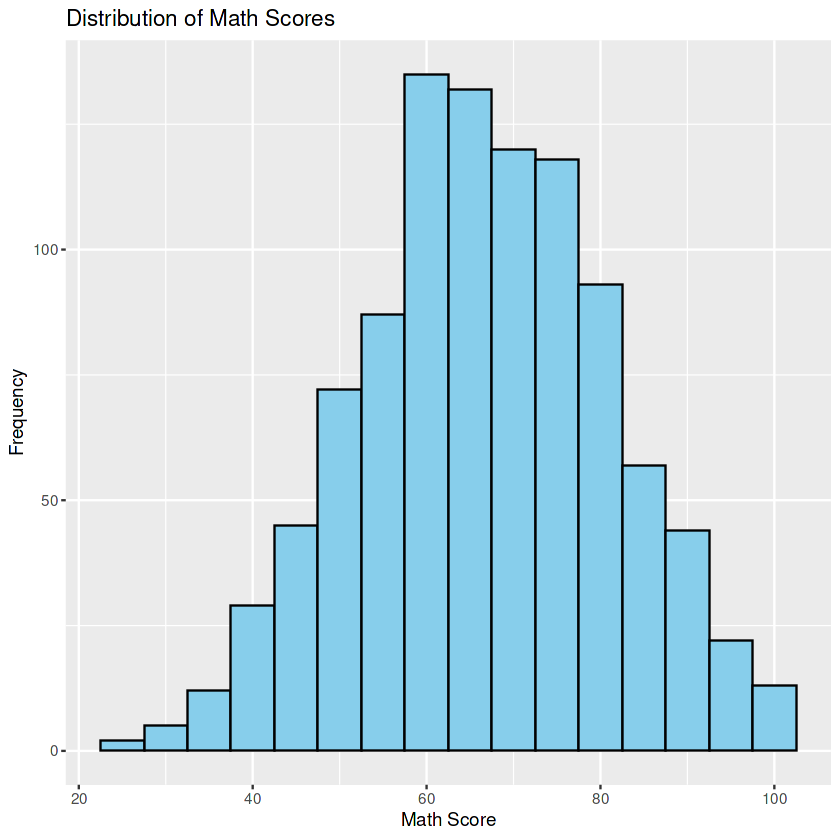

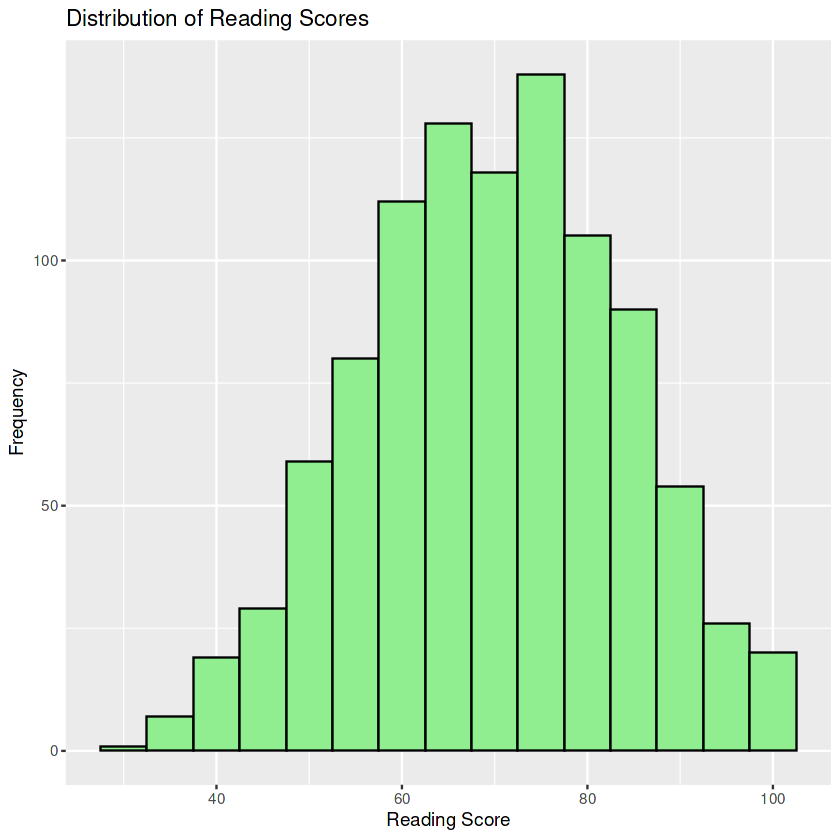

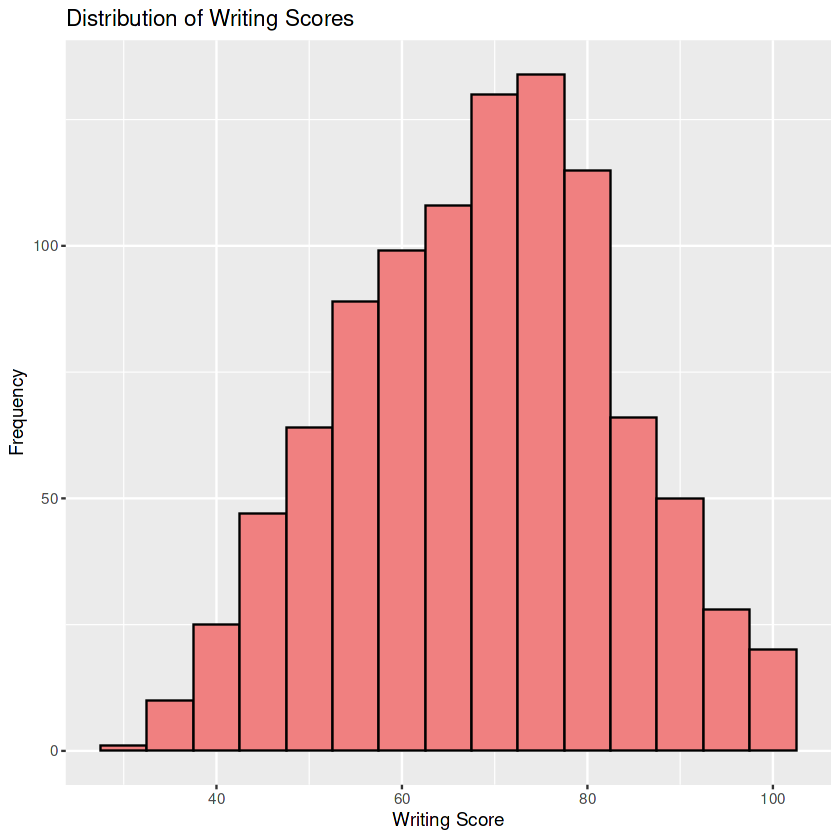

In [12]:
# Histogram for math scores
ggplot(data, aes(x = math_score)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Math Scores",
       x = "Math Score",
       y = "Frequency")

# Histogram for reading scores
ggplot(data, aes(x = reading_score)) +
  geom_histogram(binwidth = 5, fill = "lightgreen", color = "black") +
  labs(title = "Distribution of Reading Scores",
       x = "Reading Score",
       y = "Frequency")

# Histogram for writing scores
ggplot(data, aes(x = writing_score)) +
  geom_histogram(binwidth = 5, fill = "lightcoral", color = "black") +
  labs(title = "Distribution of Writing Scores",
       x = "Writing Score",
       y = "Frequency")

### Create bar plots for categorical variables

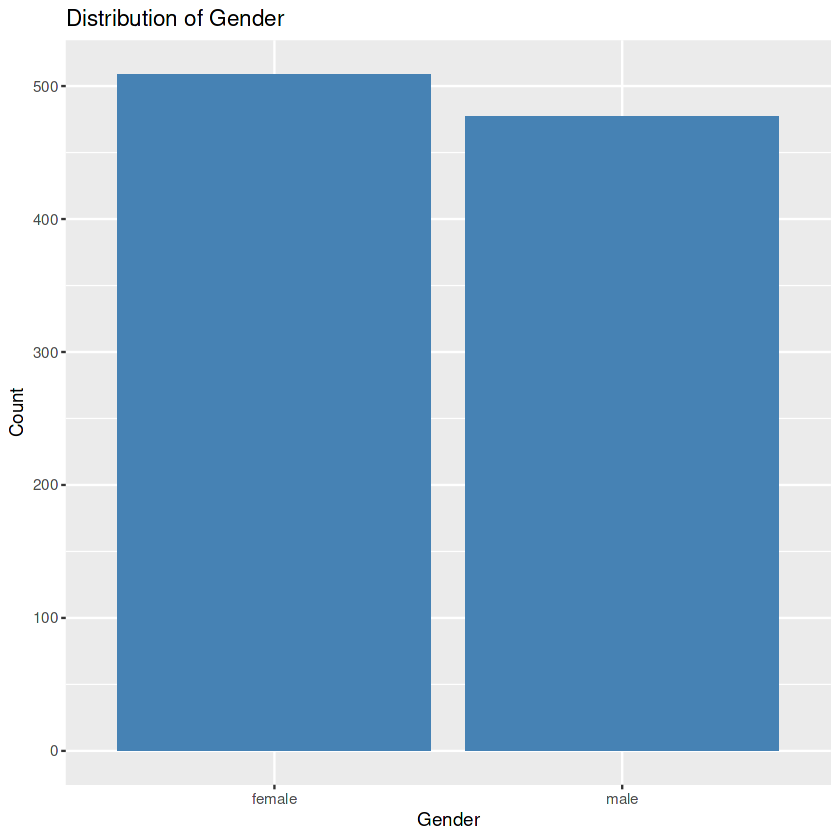

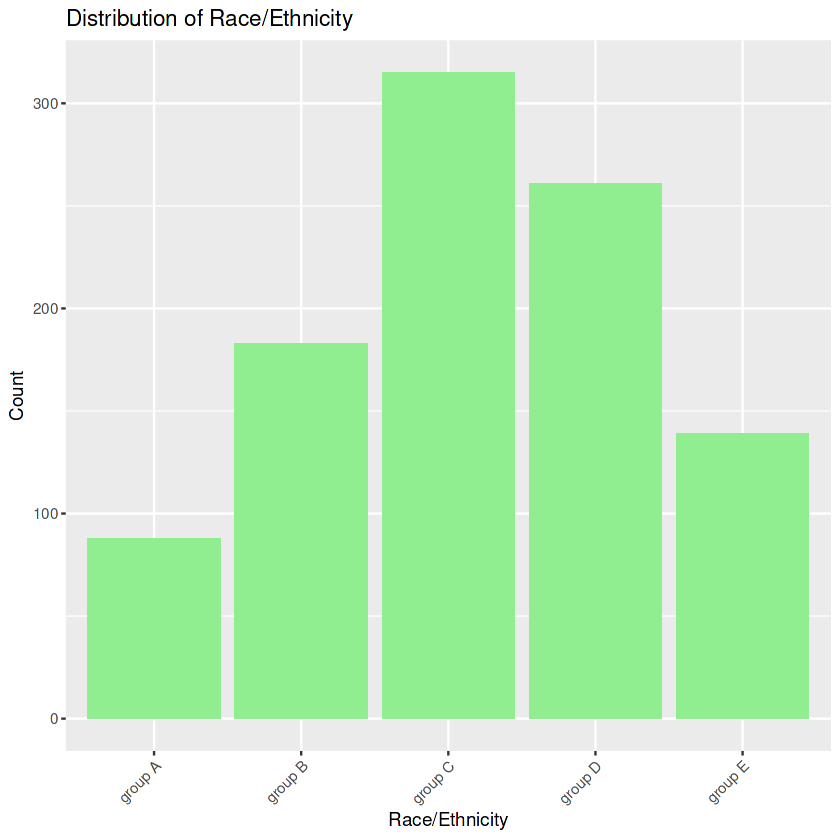

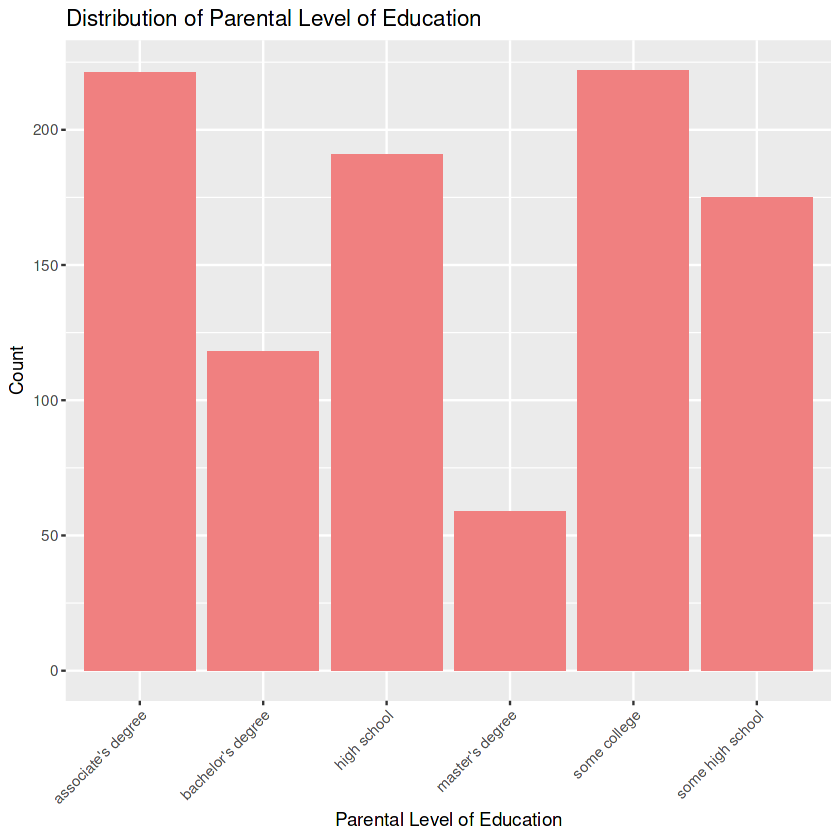

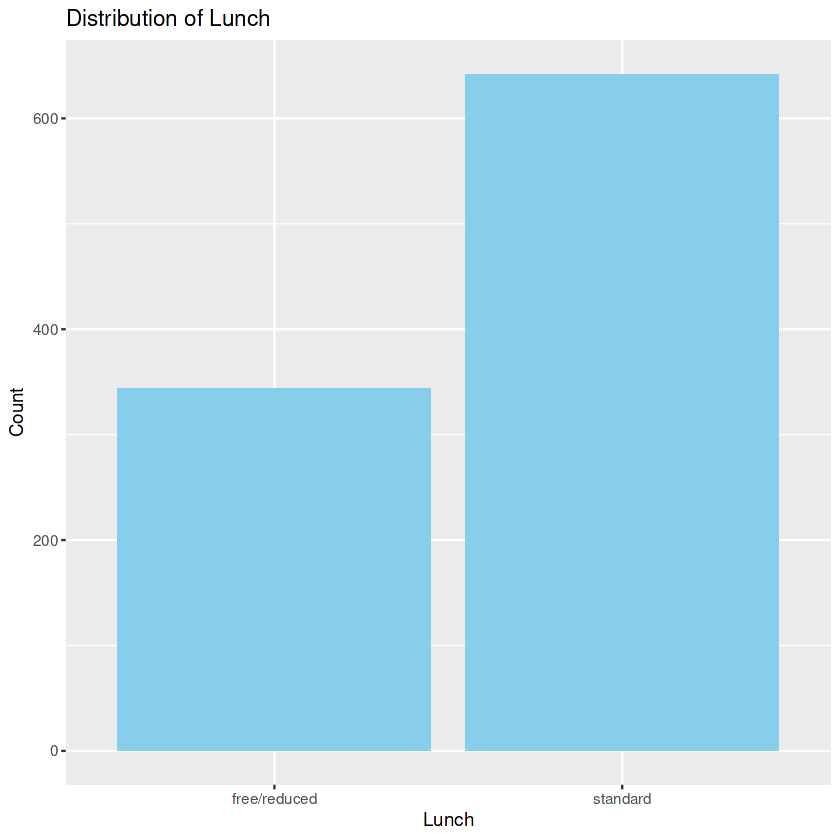

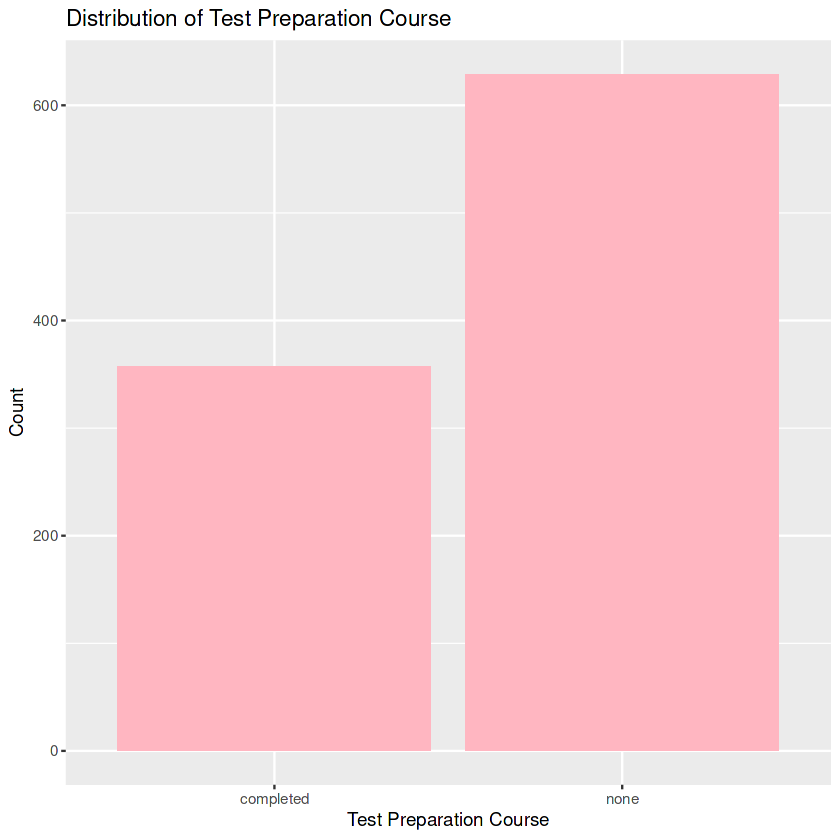

In [13]:
# Bar plot for gender
ggplot(data, aes(x = gender)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Distribution of Gender",
       x = "Gender",
       y = "Count")

# Bar plot for race/ethnicity
ggplot(data, aes(x = race_ethnicity)) +
  geom_bar(fill = "lightgreen") +
  labs(title = "Distribution of Race/Ethnicity",
       x = "Race/Ethnicity",
       y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Bar plot for parental level of education
ggplot(data, aes(x = parental_level_of_education)) +
  geom_bar(fill = "lightcoral") +
  labs(title = "Distribution of Parental Level of Education",
       x = "Parental Level of Education",
       y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Bar plot for lunch
ggplot(data, aes(x = lunch)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Distribution of Lunch",
       x = "Lunch",
       y = "Count")

# Bar plot for test preparation course
ggplot(data, aes(x = test_preparation_course)) +
  geom_bar(fill = "lightpink") +
  labs(title = "Distribution of Test Preparation Course",
       x = "Test Preparation Course",
       y = "Count")

## Bivariate Analysis

### Scatter plots for numerical variables

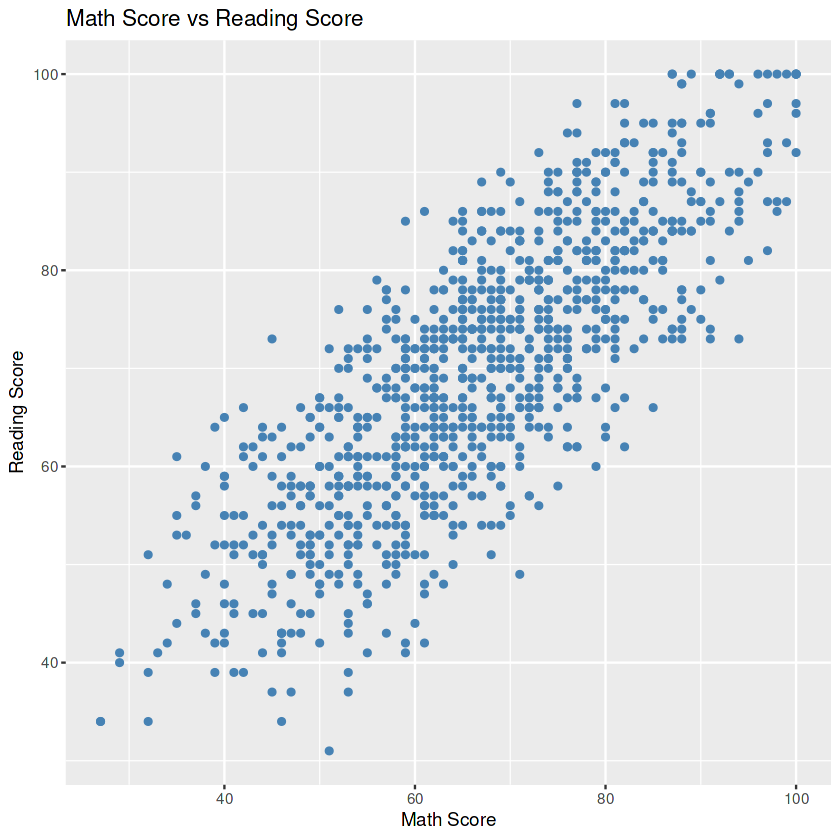

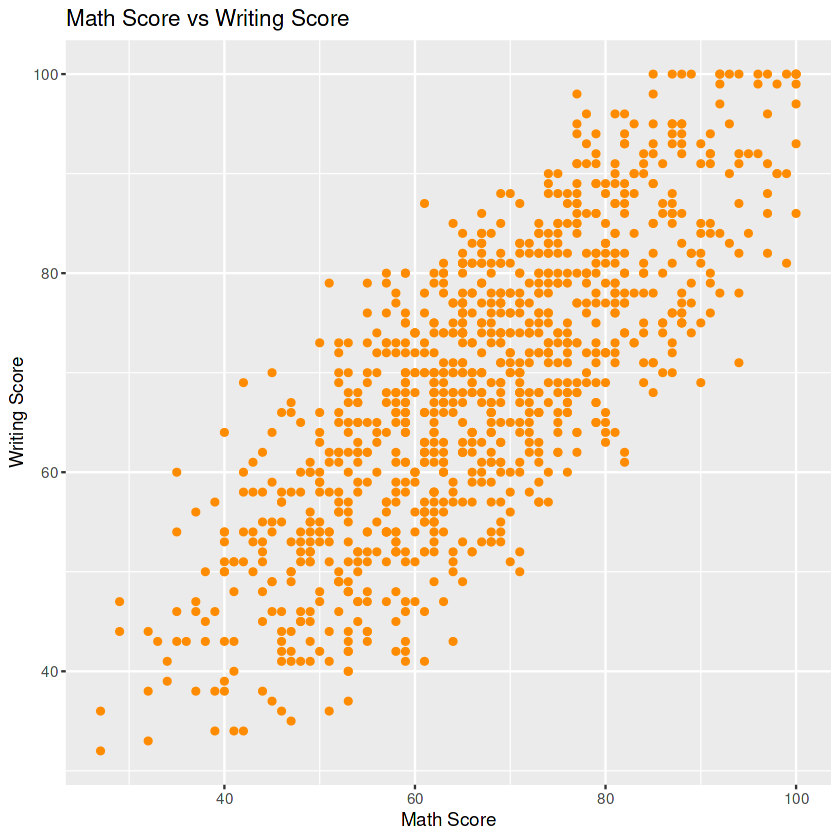

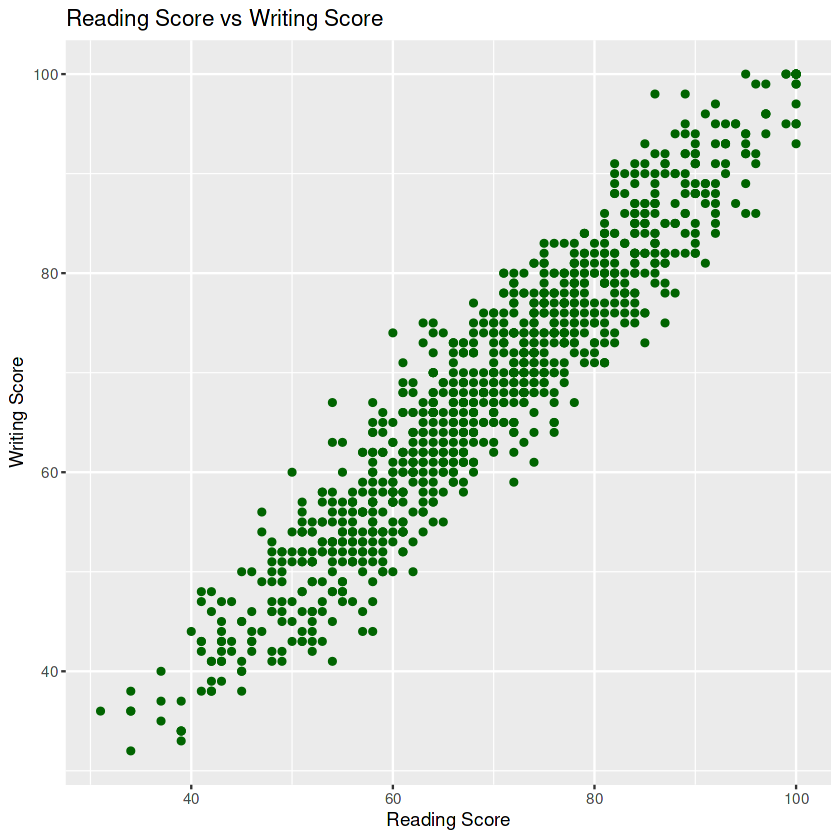

In [14]:
# Math score vs reading score
ggplot(data, aes(x = math_score, y = reading_score)) +
  geom_point(color = "steelblue") +
  labs(title = "Math Score vs Reading Score",
       x = "Math Score",
       y = "Reading Score")

# Math score vs writing score
ggplot(data, aes(x = math_score, y = writing_score)) +
  geom_point(color = "darkorange") +
  labs(title = "Math Score vs Writing Score",
       x = "Math Score",
       y = "Writing Score")

# Reading score vs writing score
ggplot(data, aes(x = reading_score, y = writing_score)) +
  geom_point(color = "darkgreen") +
  labs(title = "Reading Score vs Writing Score",
       x = "Reading Score",
       y = "Writing Score")

### Box plots for comparing numerical variable across different categories

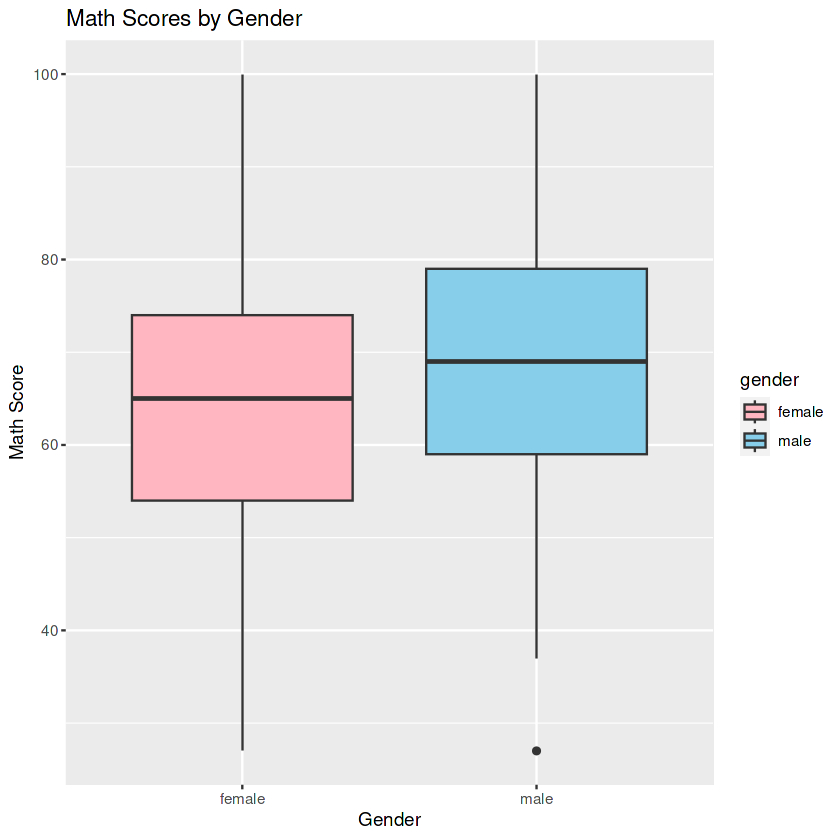

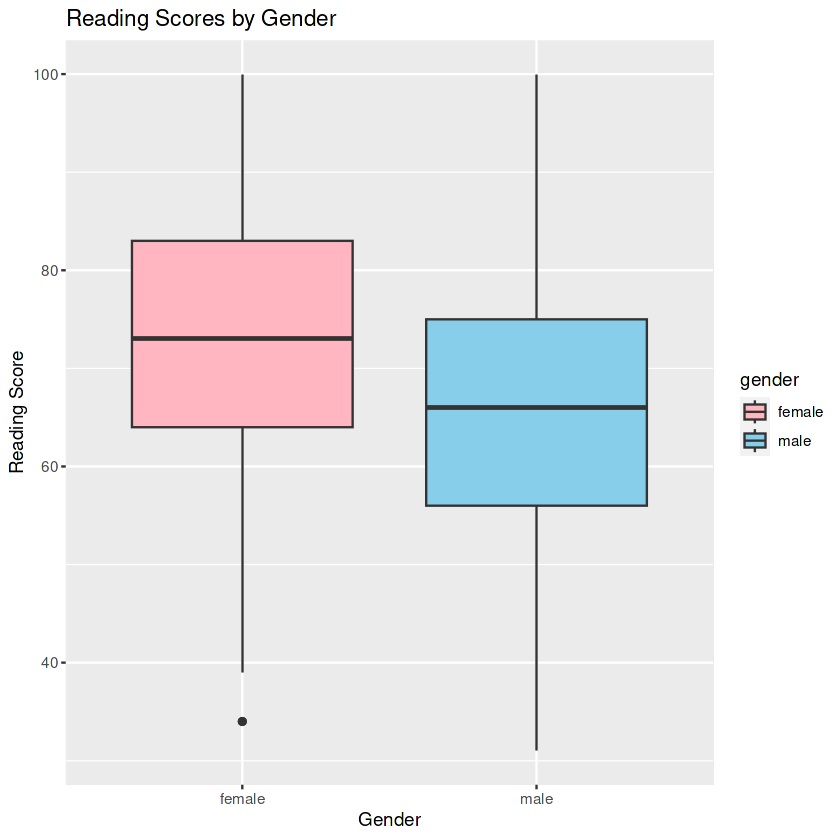

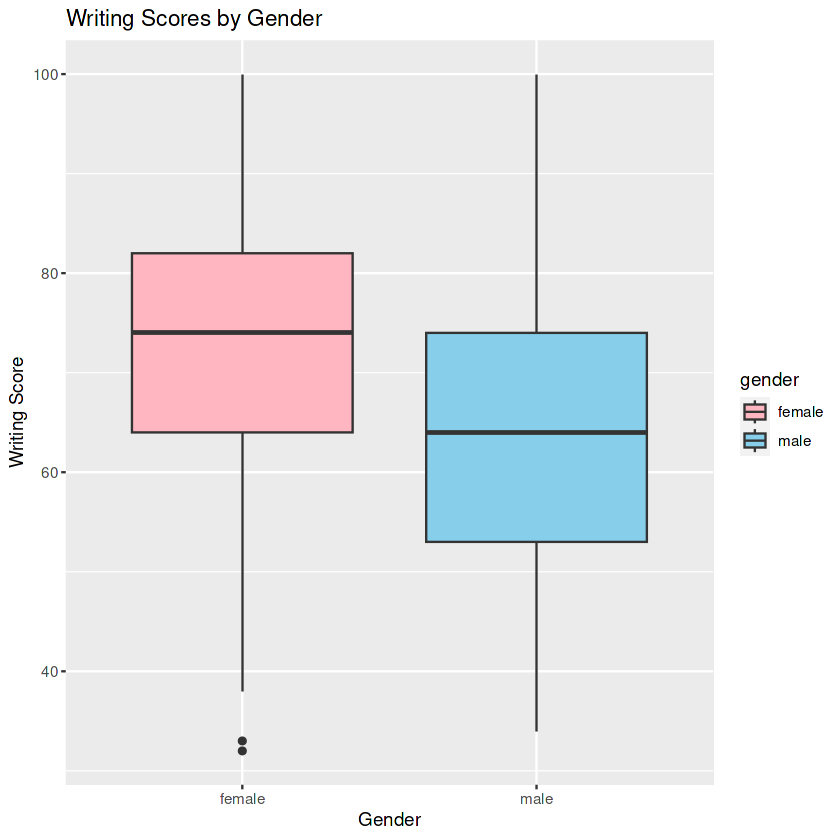

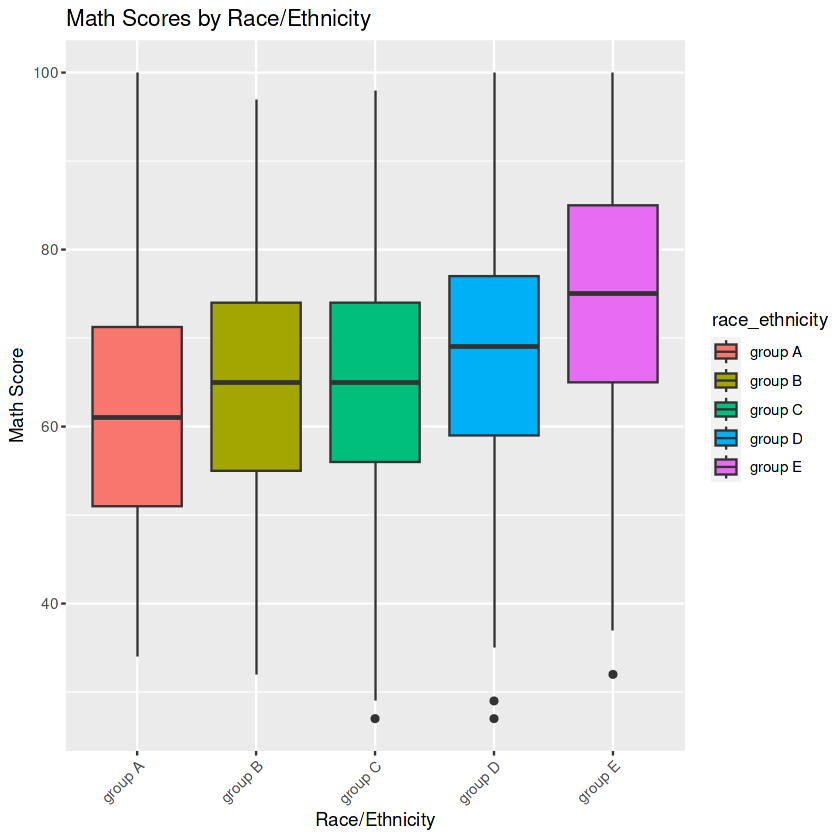

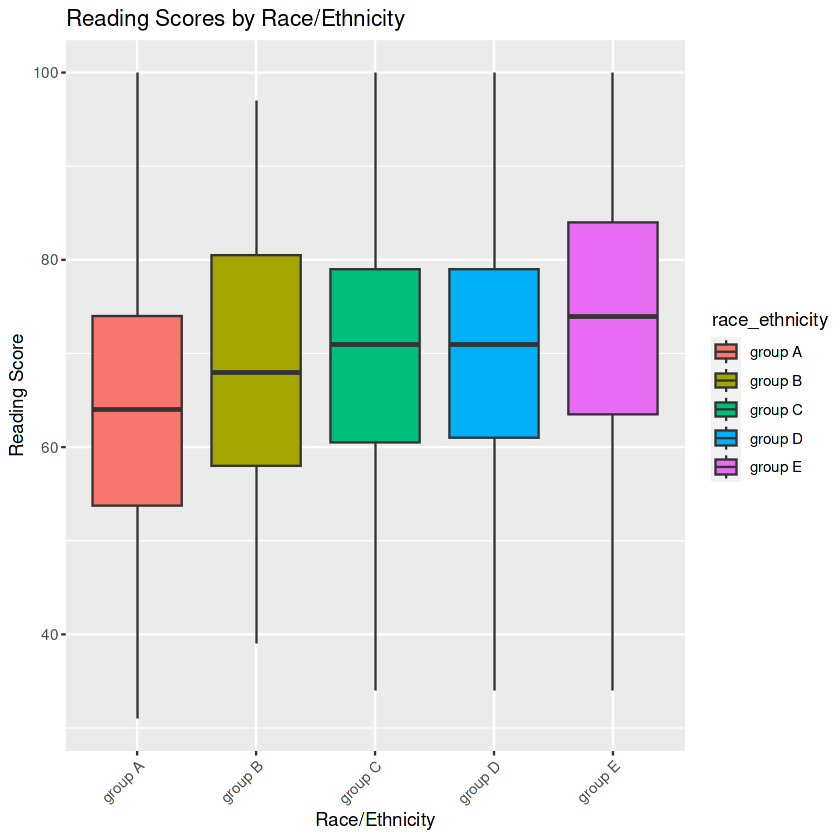

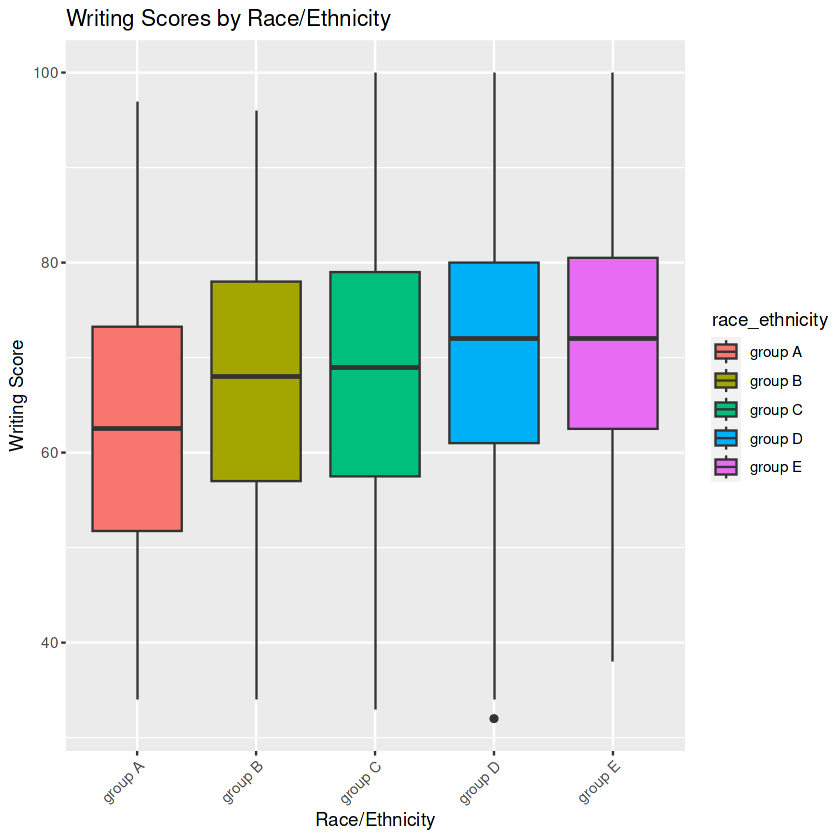

In [15]:
# Box plot of math scores by gender
ggplot(data, aes(x = gender, y = math_score, fill = gender)) +
  geom_boxplot() +
  labs(title = "Math Scores by Gender",
       x = "Gender",
       y = "Math Score") +
  scale_fill_manual(values = c("male" = "skyblue", "female" = "lightpink"))

# Box plot of reading scores by gender
ggplot(data, aes(x = gender, y = reading_score, fill = gender)) +
  geom_boxplot() +
  labs(title = "Reading Scores by Gender",
       x = "Gender",
       y = "Reading Score") +
  scale_fill_manual(values = c("male" = "skyblue", "female" = "lightpink"))

# Box plot of writing scores by gender
ggplot(data, aes(x = gender, y = writing_score, fill = gender)) +
  geom_boxplot() +
  labs(title = "Writing Scores by Gender",
       x = "Gender",
       y = "Writing Score") +
  scale_fill_manual(values = c("male" = "skyblue", "female" = "lightpink"))

# Box plot of math scores by race/ethnicity
ggplot(data, aes(x = race_ethnicity, y = math_score, fill = race_ethnicity)) +
  geom_boxplot() +
  labs(title = "Math Scores by Race/Ethnicity",
       x = "Race/Ethnicity",
       y = "Math Score") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Box plot of reading scores by race/ethnicity
ggplot(data, aes(x = race_ethnicity, y = reading_score, fill = race_ethnicity)) +
  geom_boxplot() +
  labs(title = "Reading Scores by Race/Ethnicity",
       x = "Race/Ethnicity",
       y = "Reading Score") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Box plot of writing scores by race/ethnicity
ggplot(data, aes(x = race_ethnicity, y = writing_score, fill = race_ethnicity)) +
  geom_boxplot() +
  labs(title = "Writing Scores by Race/Ethnicity",
       x = "Race/Ethnicity",
       y = "Writing Score") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [16]:
# Calculate correlation matrix
correlation_matrix <- cor(data[c("math_score", "reading_score", "writing_score")])
print(correlation_matrix)

              math_score reading_score writing_score
math_score     1.0000000     0.7988810     0.7806676
reading_score  0.7988810     1.0000000     0.9498439
writing_score  0.7806676     0.9498439     1.0000000


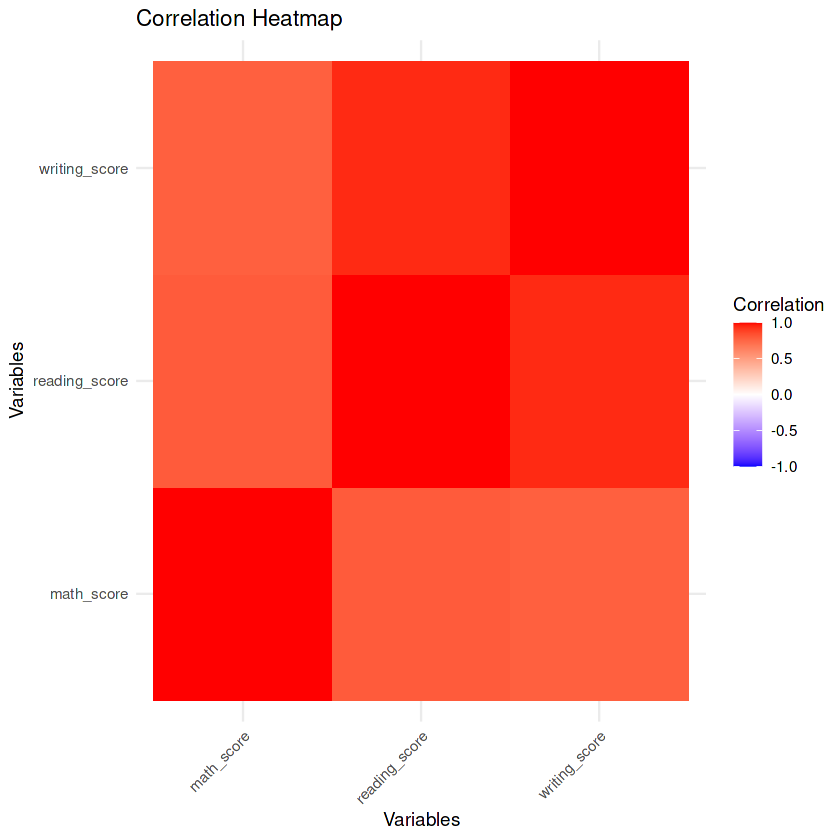

In [17]:
# Visualize correlation matrix using a heatmap
ggplot(data = melt(correlation_matrix), aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(-1,1)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Correlation Heatmap",
       x = "Variables",
       y = "Variables",
       fill = "Correlation")

#### Compare distributions across different groups

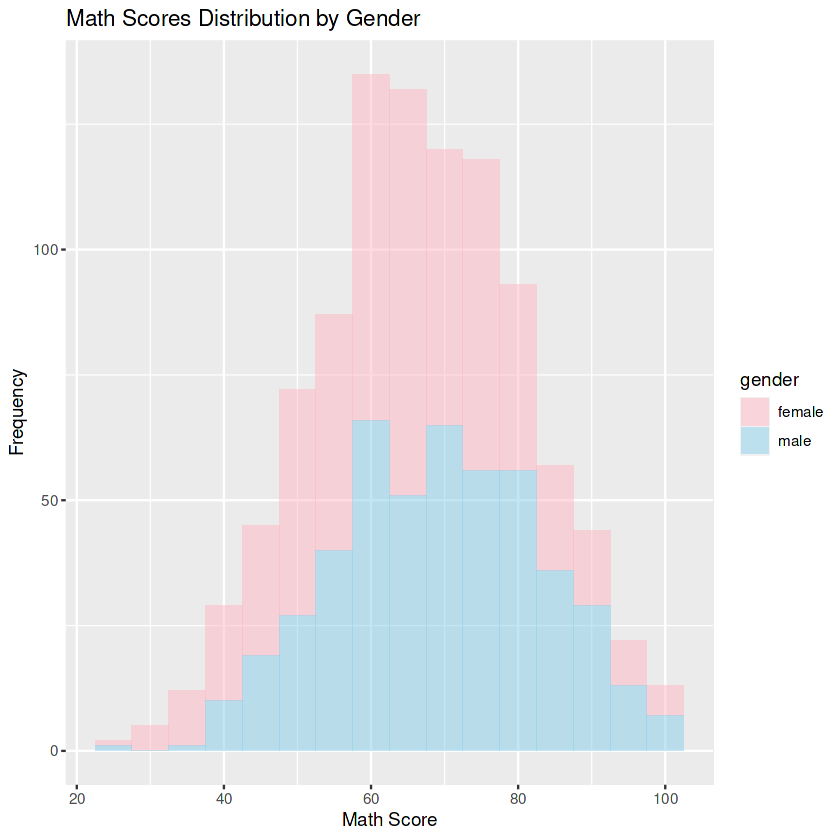

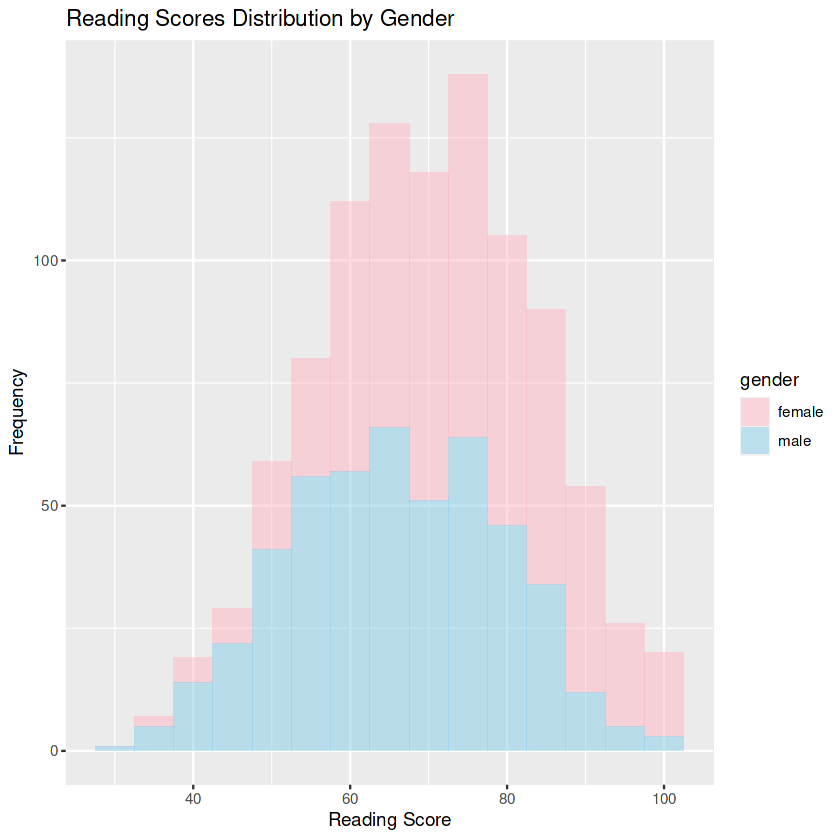

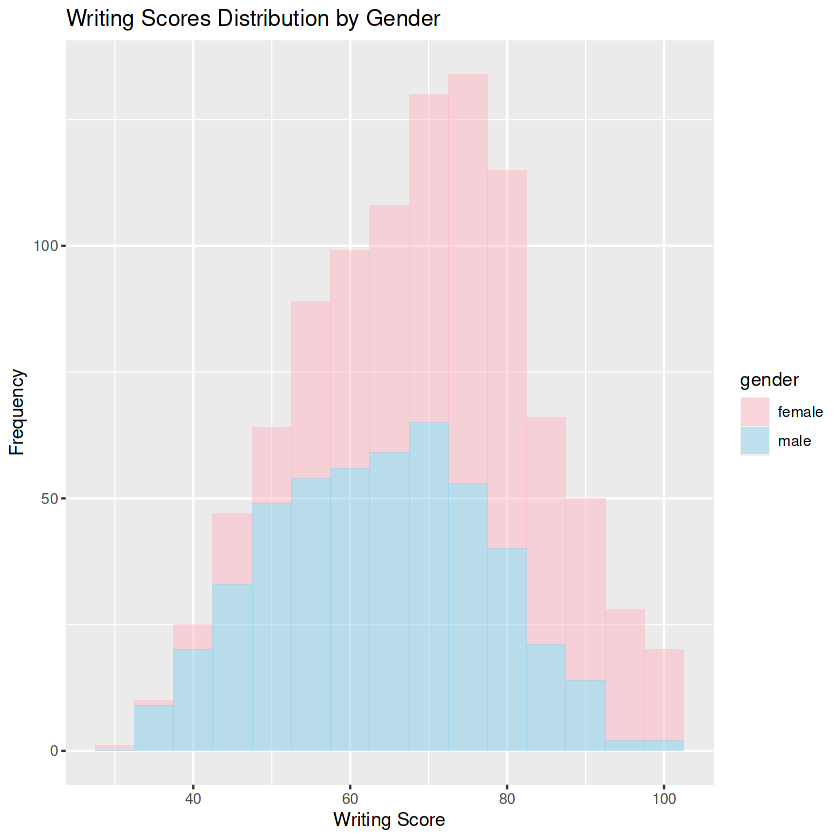

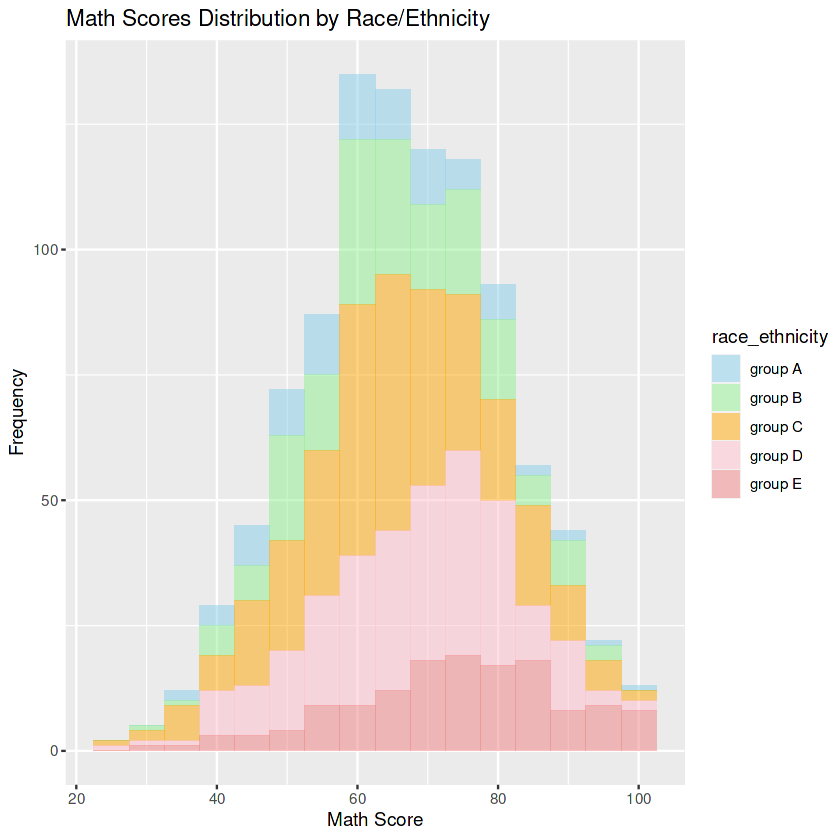

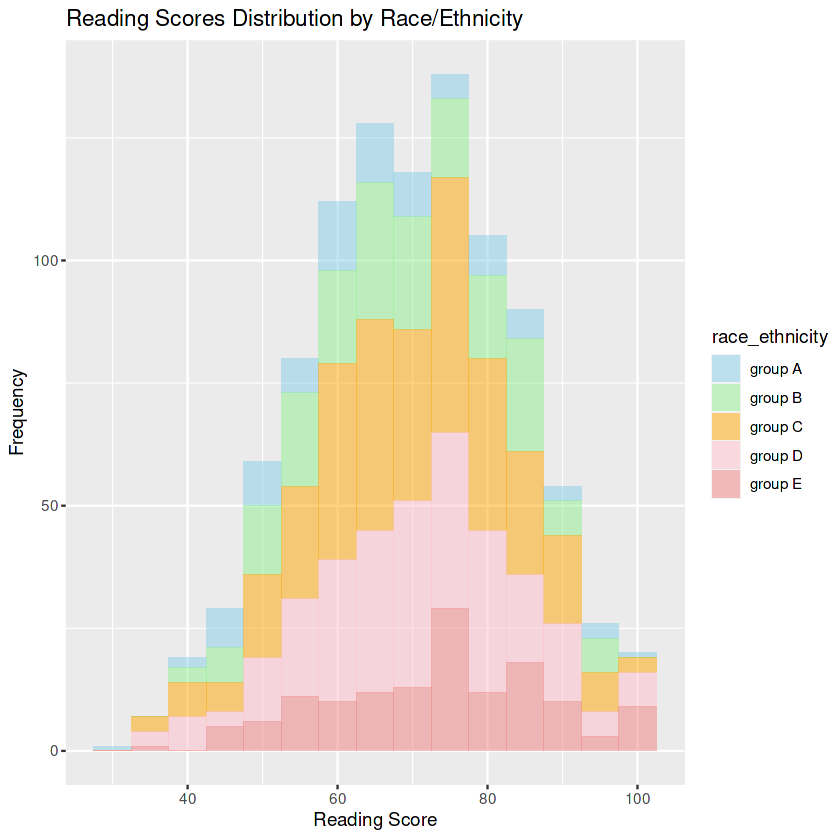

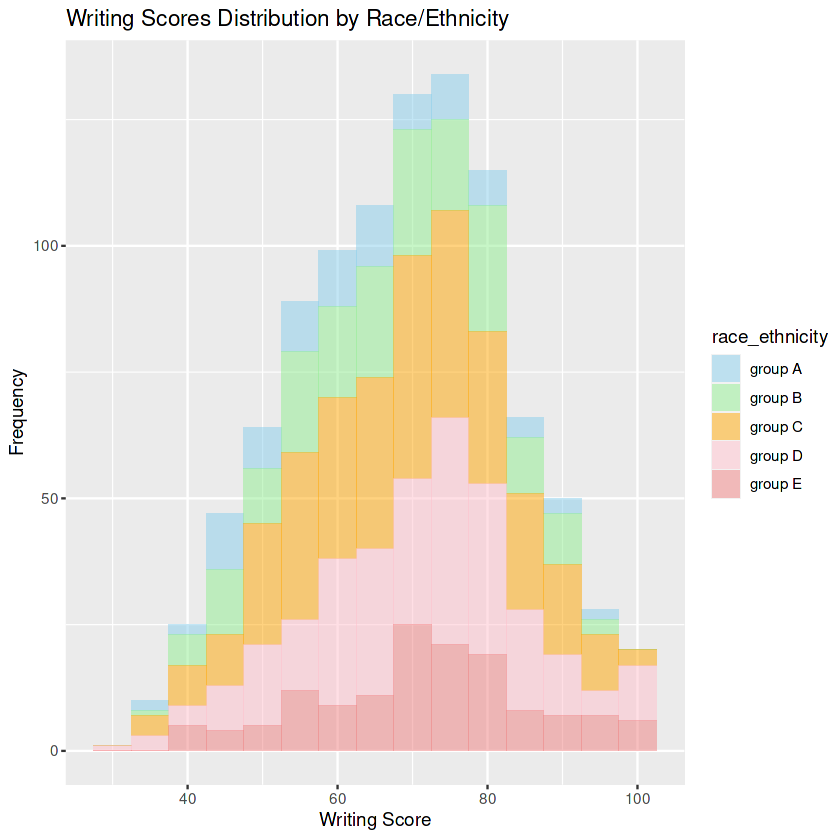

In [19]:
# Histogram of math scores by gender
ggplot(data, aes(x = math_score, fill = gender)) +
  geom_histogram(binwidth = 5, alpha = 0.5) +
  labs(title = "Math Scores Distribution by Gender",
       x = "Math Score",
       y = "Frequency") +
  scale_fill_manual(values = c("male" = "skyblue", "female" = "lightpink"))

# Histogram of reading scores by gender
ggplot(data, aes(x = reading_score, fill = gender)) +
  geom_histogram(binwidth = 5, alpha = 0.5) +
  labs(title = "Reading Scores Distribution by Gender",
       x = "Reading Score",
       y = "Frequency") +
  scale_fill_manual(values = c("male" = "skyblue", "female" = "lightpink"))

# Histogram of writing scores by gender
ggplot(data, aes(x = writing_score, fill = gender)) +
  geom_histogram(binwidth = 5, alpha = 0.5) +
  labs(title = "Writing Scores Distribution by Gender",
       x = "Writing Score",
       y = "Frequency") +
  scale_fill_manual(values = c("male" = "skyblue", "female" = "lightpink"))

# Histogram of math scores by race/ethnicity
ggplot(data, aes(x = math_score, fill = race_ethnicity)) +
  geom_histogram(binwidth = 5, alpha = 0.5) +
  labs(title = "Math Scores Distribution by Race/Ethnicity",
       x = "Math Score",
       y = "Frequency") +
  scale_fill_manual(values = c("group A" = "skyblue", "group B" = "lightgreen", "group C" = "orange", "group D" = "pink", "group E" = "lightcoral"))

# Histogram of reading scores by race/ethnicity
ggplot(data, aes(x = reading_score, fill = race_ethnicity)) +
  geom_histogram(binwidth = 5, alpha = 0.5) +
  labs(title = "Reading Scores Distribution by Race/Ethnicity",
       x = "Reading Score",
       y = "Frequency") +
  scale_fill_manual(values = c("group A" = "skyblue", "group B" = "lightgreen", "group C" = "orange", "group D" = "pink", "group E" = "lightcoral"))

# Histogram of writing scores by race/ethnicity
ggplot(data, aes(x = writing_score, fill = race_ethnicity)) +
  geom_histogram(binwidth = 5, alpha = 0.5) +
  labs(title = "Writing Scores Distribution by Race/Ethnicity",
       x = "Writing Score",
       y = "Frequency") +
  scale_fill_manual(values = c("group A" = "skyblue", "group B" = "lightgreen", "group C" = "orange", "group D" = "pink", "group E" = "lightcoral"))